In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, FontManager, Sbopen

In [4]:
df = pd.read_csv('./dataset/TAA_PASS_FINAL_CHAMPIONS_2019 - Sheet1.csv')
df.head()

,player_name,event_type,pass_outcome_name,location_0,location_1,pass_end_location_0,pass_end_location_1
0,Trent Alexander-Arnold,Pass,Incomplete,44.4,66.6,79.0,65.6
1,Trent Alexander-Arnold,Pass,Incomplete,84.3,80.0,113.3,70.6
2,Trent Alexander-Arnold,Pass,Out,3.0,67.2,27.8,80.4
3,Trent Alexander-Arnold,Pass,Complete,10.8,67.0,3.0,52.9
4,Trent Alexander-Arnold,Pass,Incomplete,24.0,80.0,43.1,71.0


In [41]:
successful_pass = df[df['pass_outcome_name'] == 'Complete'].reset_index(drop=True)
unsuccessful_pass = df[df['pass_outcome_name'] == 'Incomplete'].reset_index(drop=True)
out_pass = df[df['pass_outcome_name'] == 'Out'].reset_index(drop=True)

17

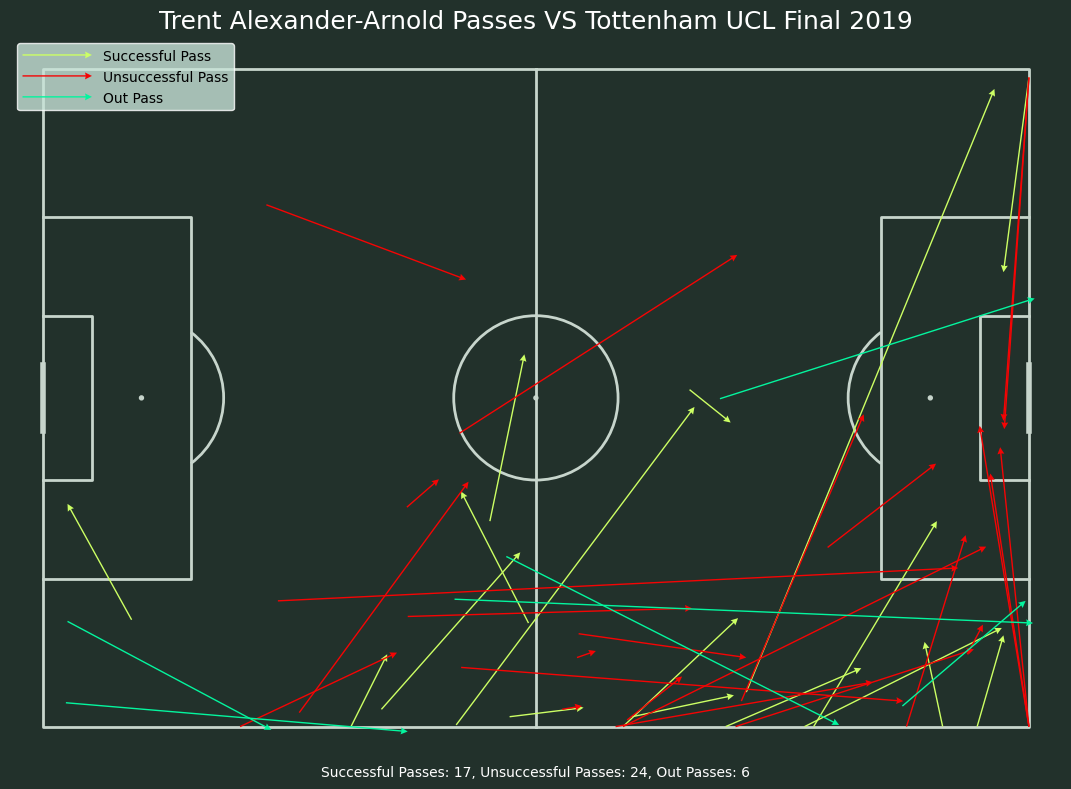

In [46]:
# Draw the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

# Successful Pass    
pitch.arrows(successful_pass.location_0, successful_pass.location_1, successful_pass.pass_end_location_0, successful_pass.pass_end_location_1, width=1, headwidth=5, headlength=5, color='#CCFF64', ax=ax, label='Successful Pass')

# Unsuccessful Pass
pitch.arrows(unsuccessful_pass.location_0, unsuccessful_pass.location_1, unsuccessful_pass.pass_end_location_0, unsuccessful_pass.pass_end_location_1, width=1, headwidth=5, headlength=5, color='#F50404', ax=ax, label='Unsuccessful Pass')

# Out Pass
pitch.arrows(out_pass.location_0, out_pass.location_1, out_pass.pass_end_location_0, out_pass.pass_end_location_1, width=1, headwidth=5, headlength=5, color='#04F59E', ax=ax, label='Out Pass')

# Set up Legend
ax.legend(facecolor='#C7E3D8', handlelength=5, edgecolor='#fff', fontsize=10, loc='upper left' )

# Set the description
ax.set_xlabel(f'Successful Passes: {len(successful_pass.index)}, Unsuccessful Passes: {len(unsuccessful_pass.index)}, Out Passes: {len(out_pass.index)}', color='white')

# Set the title
ax_title = ax.set_title('Trent Alexander-Arnold Passes VS Tottenham UCL Final 2019', fontsize=18, color='white')